In [1]:
# Import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

# Set the manual seed
torch.manual_seed(42)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Plot the data
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):

    plt.figure(figsize=(6, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot the predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

Using device: cpu


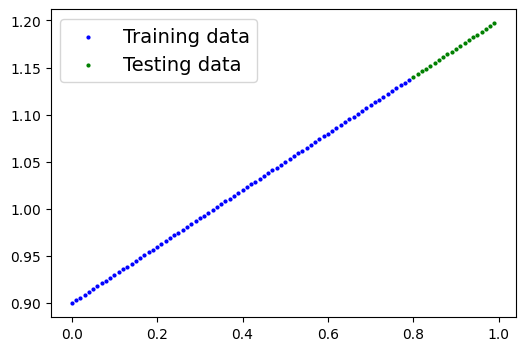

In [2]:
# 1. Create some data using linear regression and Visualize it
# Initiate the parameters
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Plot the data
plot_predictions(X_train, y_train, X_test, y_test, None)

In [3]:
# 2. Building a Pytorch Linear Model
# Create a linear model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        """
            in_features: the dimension of input to the layer
            out_features : the dimension of output of the layer
        """
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Instantiate a model
model_0 = LinearRegressionModel()
print(f"Initial model parameters:\n {model_0.state_dict()}.")


Initial model parameters:
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))]).


Epoch: 0 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 20 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 40 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 60 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 80 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 100 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 120 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 140 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 160 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 180 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 200 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 220 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 240 | Loss: 0.007878491654992104 | Test loss: 0.007064247038215399
Epoch: 260 | Loss: 0.007878491654992104 | Te

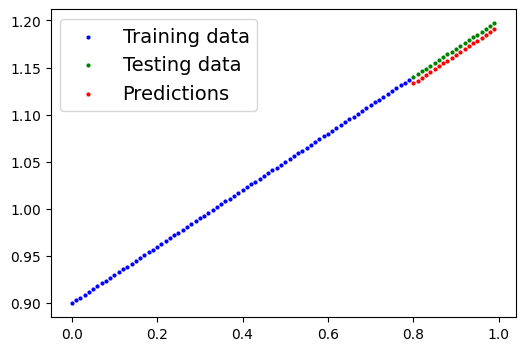

In [12]:
# 3. Train a model

# Set up the loss function
loss_fn = nn.L1Loss()   # Minimum absolute value

# Set up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Training loop
epochs = 300

for epoch in range(epochs):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    """
        In pytorch implementation the gradients will accumulate through the loop so we need to make them zero in the beginning of each epoch
    """
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print the loss
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

print(f"\nEstimated Model Parameters: {model_0.state_dict()}")

# Plot the prediction on test data
with torch.inference_mode():
    y_pred = model_0(X_test)
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_pred)

In [5]:
# 4. Saving a PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
# exist_ok = True --> It doesn't give us error if the directory has been existed.
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "linear_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models\linear_model.pth


In [6]:
# 5. Load a PyTorch model

# 1. Create a new instance of linear regression model
loaded_model_0 = LinearRegressionModel()

# 2. Load the saved model
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

# 3. Put the loaded model to device
loaded_model_0.to(device)

print(f"Estimated loaded parameters: {loaded_model_0.state_dict()}")

Estimated loaded parameters: OrderedDict([('linear_layer.weight', tensor([[0.3028]])), ('linear_layer.bias', tensor([0.8910]))])
